57.2024686103742


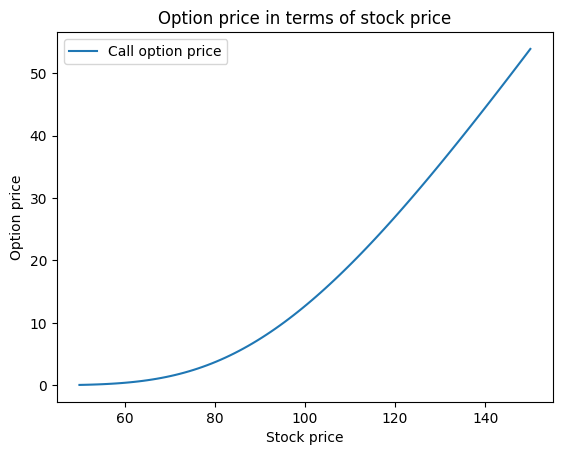

In [1]:
import numpy as np
from numpy.random import randint as flip 
from numpy import exp, sqrt, log, mean,std
import matplotlib.pyplot as plt
from scipy.stats import norm

def phi(x):
    return norm.cdf(x)

K = float(input("Enter the value of the strike price of the European call: "))
T = float(input("Enter the maturity in years of the European call: "))
S = float(input("Enter the initial stock price: "))
vol = float(input("Enter the volatility of the stock: "))
r = float(input("Enter the rate of return of the stock: "))

def d_1(S, K, vol, r, T):   
    return (log(S/K) + (r + vol**2 / 2)*T)/(vol * sqrt(T))

def d_2(S, K, vol, r, T):
    return d_1(S, K, vol, r, T) - vol * sqrt(T)

def BS_european_price(S, K, vol, r, T):
    return S*phi(d_1(S, K, vol, r, T)) - K * exp(-r*T)*phi(d_2(S, K, vol, r, T))

def delta(S, K, vol, r, T):
    return phi(d_1(S, K, vol, r, T))

def gamma(S, K, vol, r, T):
    return delta(S, K, vol, r, T)/(S * vol * sqrt(T))

def rho(S, K, vol, r, T):
    return K * T * exp(-r*T)*delta(S, K, vol, r, T)

def theta(S, K, vol, r, T):
    return (-1) * S * delta(S, K, vol, r, T) * vol / (2 * sqrt(T)) - r*K*exp(-r*T)*delta(S, K, vol, r, T)

def vega(S, K, vol, r, T):
    return S*delta(S, K, vol, r, T)*sqrt(T)

print(BS_european_price(S, K, vol, r, T))

stock_price = np.linspace(50, 150, 100)
call_price = np.zeros_like(stock_price)
put_price = np.zeros_like(stock_price)

for i, price in enumerate(stock_price):
    call_price[i] = BS_european_price(price, K, T, r, vol)

plt.plot(stock_price, call_price, label="Call option price")
plt.xlabel("Stock price")
plt.ylabel("Option price")
plt.title("Option price in terms of stock price")
plt.legend()
plt.show()